Esse material de estudo visa se aprofundar na construção matematica por trás da regressão logistica entendendo seu conceito a fundo.

Quando falamos de regressão logistica falamos de modelos que tem como resposta um resultado binário.
E diferente do que se pensa em um primeiro contato é um modelo linear, assim como a regressão linear. O que torna ela logistica é uma função sigmoide, que basicamente transforma a combinação linear das variaveis em probabilidade.
Ser linear significa que ela tem uma função base linear, como a regressão linear.

Onde:
g(y)=α+β1x1+β2x2+...+βpxp=η

Em que  α,β1,β2,...βp  são constantes.

Temos então o logaritmo da chance:

logito=log(p1−p)

Logo:

log(p1−p)=α+β1x1+β2x2+...+βpxp

Para voltar na probabilidade fariamos:
p=1(1+e−η)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# **1 - Nossa base de dados e um pouco de análise bivariada:**

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
import pandas as pd

# Criando uma tabela com os dados de sexo e sobreviventes
tab = pd.crosstab(titanic['sex'], titanic['survived'], margins=True)
# Calculando a proporção de sobreviventes por sexo
tab['Survival Rate'] = tab[1] / tab['All']
print(tab)


survived    0    1  All  Survival Rate
sex                                   
female     81  233  314       0.742038
male      468  109  577       0.188908
All       549  342  891       0.383838


Vemos que a probabilidade de sobrevivência de mulheres é muito maior que a de homens.

In [4]:
tab['chance'] = tab[1]/tab[0]
tab

survived,0,1,All,Survival Rate,chance
sex,,,,,
female,81,233,314,0.742038,2.876543
male,468,109,577,0.188908,0.232906
All,549,342,891,0.383838,0.622951


In [5]:
2.87/0.23

12.478260869565217

Aqui temos o calculo da chance de sobreviência vemos que a da mulher é 12x a chance de sobrevivência dos homens.

# **2 - Modelo de Regressão Logistica com a variavel sexo apenas:**

Diferente da regressão linear que temos o metodo dos minimos quadrados nesse caso temos o metodo Máxima Verossimilhança.

In [6]:
import statsmodels.formula.api as smf

reglog = smf.logit("survived ~ sex",data=titanic).fit()
reglog.summary()

Optimization terminated successfully.
         Current function value: 0.515041
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      889
Method:                           MLE   Df Model:                            1
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:                  0.2266
Time:                        22:09:11   Log-Likelihood:                -458.90
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.020e-60
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
===============================================================================
"""

In [7]:
##ALFA
reglog.params[1]

-2.5137097125817642

In [8]:
##BETA
reglog.params[0]

1.0565892988932617

Vamos calcular a probabilidade para cada evento utilizando o eta com alfa e beta


In [9]:
eta = reglog.params[0] + reglog.params[1]
eta

-1.4571204136885025

Log da chance de um passageiro do sexo masculino de sobreviver.

In [10]:
chance = np.exp(eta)
chance

0.23290598290598302

Transformamos na chance o log.
Para cada passageiro que não sobreviveu eu tenho 0.23 que sobreviveu.

Vimos que o valor da regressão então bateu com o que calculamos acima.

In [ ]:
## probabilidade

In [11]:
p = 1/(1 + np.exp(-eta))
p

0.18890814558058933

Para calcular a probabilidade podemos usar o predict para não ter que calcular.

In [12]:
titanic['predito'] = reglog.predict(titanic)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,predito
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.188908
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.742038
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.742038
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.742038
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.188908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.188908
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0.742038
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.742038
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.188908


# **3 - Modelo de Regressão Logistica com mais de uma variavel:**

In [14]:
reglog = smf.logit(" survived ~ sex + C(pclass) + fare"
                   , data=titanic).fit()

reglog.summary()
##usamos aqui a função logit para ajustar nosso modelo e especificamos as colunas que queremos como variaveis a serem utilizadas.
# o c no p class faz com que ele olhe a variavel como dummie

Optimization terminated successfully.
         Current function value: 0.463592
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 20 Sep 2023   Pseudo R-squ.:                  0.3038
Time:                        22:22:25   Log-Likelihood:                -413.06
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 9.314e-77
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1476      0.278      7.716      0.000       1.602       2.693
sex[T.male]       -2.6246      0.185    -14.170      0.000      -2.988      -2.262
C(pclass)[T.2]    -0.7366      0.271     -2.717      0.007      -1.268      -0.205
C(pclass)[T.3]    -1.7903      0.252     -7.111      0.000      -2.284      -1.297
fare               0.0018      0.002      0.864      0.388      -0.002       0.006
==================================================================================
"""

Vemos que fare não é uma variavel importante se comparada as outras, devido ao p>z que nos traz a signficancia. Ou seja, p é maior que o valor critico z.

Sexo masculino tem menos chance de sobrevivencia e classe 3 também.

In [15]:
## calculando a prob de sobrevivencia de um homem na classe 3
eta = 2.2971 + (-2.6419) + (-1.9055)
chance = np.exp(eta)
prob = 1/(1+np.exp(-eta))
prob

0.09532359065697854

In [16]:
titanic['predito'] = reglog.predict(titanic)

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,predito
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.094982
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.906951
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.591848
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.904127
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.095107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,0.233246
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,0.900430
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,0.598639
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,0.395887


# **4 - Qualificando o modelo:**

Calibragem: O quanto uma estimativa de probabilidade de evento esta próxima da realidade.

In [17]:
titanic['predito'] = reglog.predict(titanic)
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,predito
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.094982
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0.906951
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.591848
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.904127
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.095107


Separando em grupos os preditos:

In [18]:
cat_pred = pd.qcut(titanic['predito'], 3, duplicates='drop')
cat_pred.value_counts().sort_index()

(0.0929, 0.097]    298
(0.097, 0.592]     306
(0.592, 0.956]     287
Name: predito, dtype: int64

In [19]:
group_reg = titanic.groupby(cat_pred)
qualid = group_reg[['survived']].count().rename(columns = {'survived': 'contagem'})
qualid

,contagem
predito,
"(0.0929, 0.097]",298
"(0.097, 0.592]",306
"(0.592, 0.956]",287


In [21]:
qualid['pct_sobrev'] = group_reg['survived'].mean()
qualid

,contagem,pct_sobrev
predito,,
"(0.0929, 0.097]",298,0.127517
"(0.097, 0.592]",306,0.294118
"(0.592, 0.956]",287,0.745645


In [23]:
qualid['predito'] = group_reg['predito'].mean()
qualid

,contagem,pct_sobrev,predito
predito,,,
"(0.0929, 0.097]",298,0.127517,0.095210
"(0.097, 0.592]",306,0.294118,0.315569
"(0.592, 0.956]",287,0.745645,0.756318


Temos a quantidade de passageiros por grupo.

Text(0.5, 0, 'Grupo')

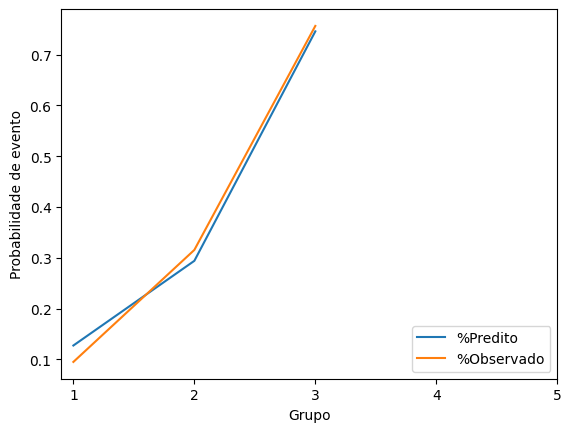

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = qualid['pct_sobrev'].plot(label='%Predito')
ax = qualid['predito'].plot(label='%Observado')

ticks = ax.set_xticks([0, 1, 2, 3, 4])
labels = ax.set_xticklabels([1, 2, 3, 4, 5])
ax.legend(loc="lower right")
ax.set_ylabel('Probabilidade de evento')
ax.set_xlabel('Grupo')


Curva ROC

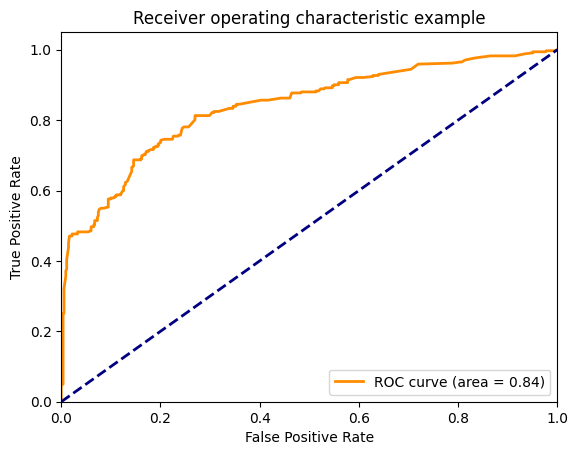

In [25]:
from sklearn.metrics import roc_curve
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(titanic['survived'], titanic['predito'])

plt.figure()
lw = 2

fpr, tpr, thresholds = metrics.roc_curve(titanic['survived'], titanic['predito'])
auc_ = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % auc_)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


Eixo y é a tx de verdadeiros positivos e no x é a tx de falsos positivos.
Pense que no ponto 1.1 temos todos previstos como sobrevivente só que nesse momento erramos todos os falsos positivos. A ideia aqui é econtrar um ponto ideal. Quanto maior a barriga melhor, quanto maior a area melhor o modelo.
A reta seria caso estivessimos chutando pq o acerto cresceria com o erro, seria 50%.

Text(0, 0.5, 'Função Distribuição Acumulada')

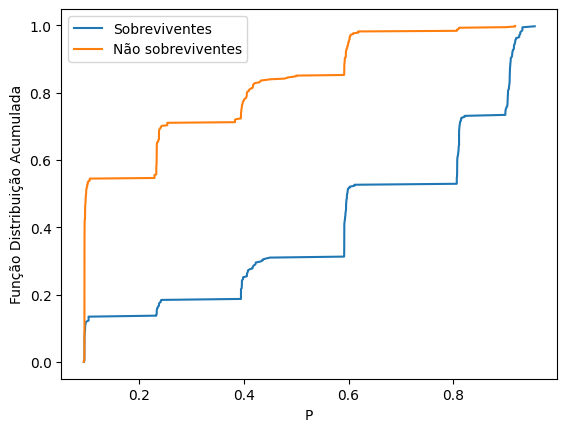

In [26]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

score_pop1 = titanic.loc[titanic['survived']==1,'predito']
ax.plot(np.sort(score_pop1), np.linspace(0, 1, len(score_pop1), endpoint=False), label='Sobreviventes')

score_pop2 = titanic.loc[titanic['survived']!=1,'predito']
ax.plot(np.sort(score_pop2), np.linspace(0, 1, len(score_pop2), endpoint=False), label='Não sobreviventes')
ax.legend()

ax.set_xlabel('P')
ax.set_ylabel('Função Distribuição Acumulada')

Aqui usamos o KS, encontramos 60% dos não sobreviventes com uma probabilidade de sobrevivencia de 20% enquanto que temos menos de 20% dos sobreviventes com essa probabilidade. Quanto maior a distância entre as duas curvas melhor o modelo.

In [27]:
from sklearn import metrics
from scipy.stats import ks_2samp

acc = metrics.accuracy_score(titanic['survived'], titanic['predito']>.5)
print('Acurácia: {0:.2f}%'.format(acc*100))

#AUC
fpr, tpr, thresholds = metrics.roc_curve(titanic['survived'], titanic['predito'])
auc_ = metrics.auc(fpr, tpr)
#Gini
gini = 2*auc_ -1
#KS
ks = ks_2samp(titanic.loc[titanic['survived'] == 1, 'predito'], titanic.loc[titanic['survived'] != 1, 'predito']).statistic

print('KS: {0:.2f}% \nAUC: {1:.2f}% \nGINI: {2:.2f}%'
      .format(ks*100, auc_*100, gini*100))

Acurácia: 78.68%
KS: 54.33% 
AUC: 83.77% 
GINI: 67.55%


Acurácia:
Proporção de previsões corretas, NUMEROPREVI/NUMEROPREVI CORRETAS, ou seja nosso modelo acertou cerca de 78% das previsões.

KS: Diferença entre positivos verdadeiros e falsos positivos.Ou seja a capacidade de separar as duas classes do modelo.

AUC: Capacidade do modelo de distinguir duas classes, semelhante a KS.

GINI: o sobro da AUC-1